/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4615/1538795611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4615/1538795611.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4615/1538795611.py:17: SettingWithCopyWarning: 
A value is trying to be set o

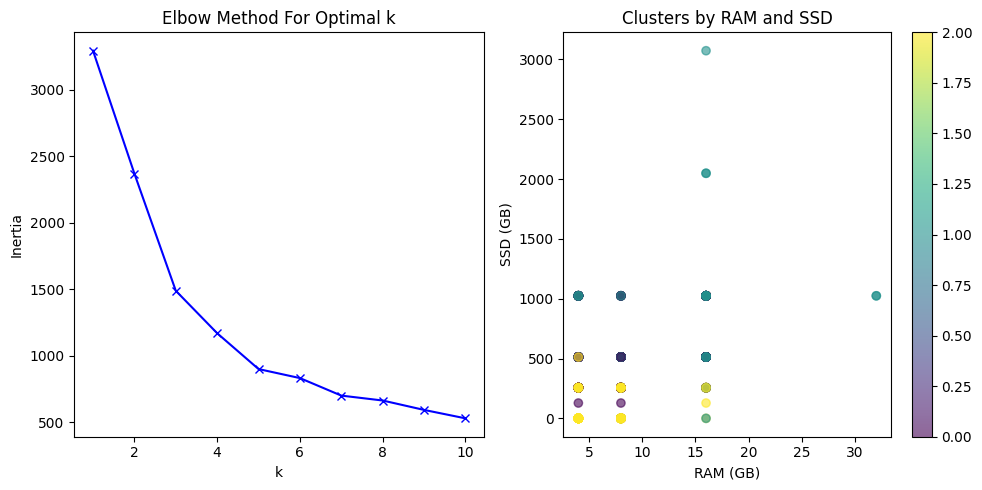

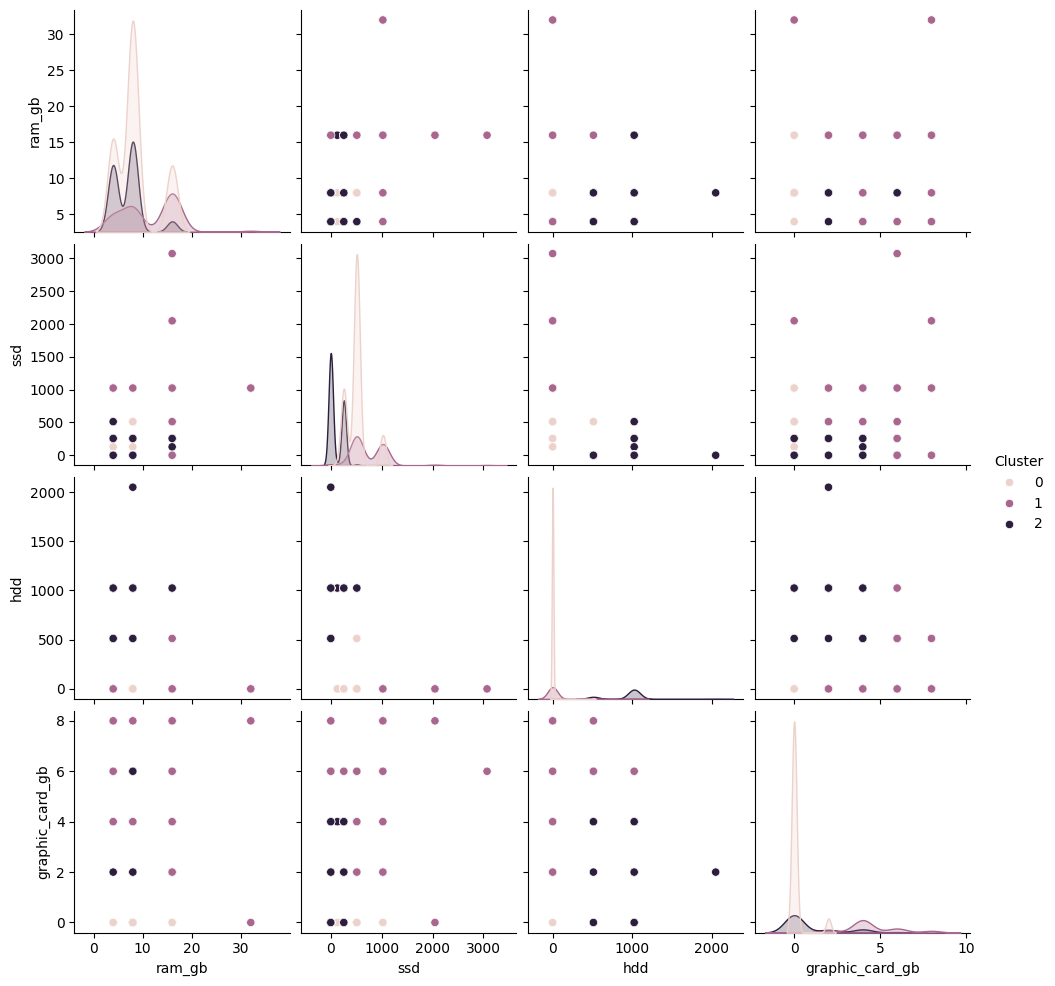


Cluster Centers:
Cluster 0:
RAM: 8.43 GB
SSD: 497.62 GB
HDD: 2.21 GB
Graphics: 0.13 GB

Cluster 1:
RAM: 11.43 GB
SSD: 737.34 GB
HDD: 33.72 GB
Graphics: 4.49 GB

Cluster 2:
RAM: 6.90 GB
SSD: 96.17 GB
HDD: 933.80 GB
Graphics: 0.89 GB

Average Price per Cluster:
Cluster 0: $72,819.81
Cluster 1: $113,807.81
Cluster 2: $54,092.24


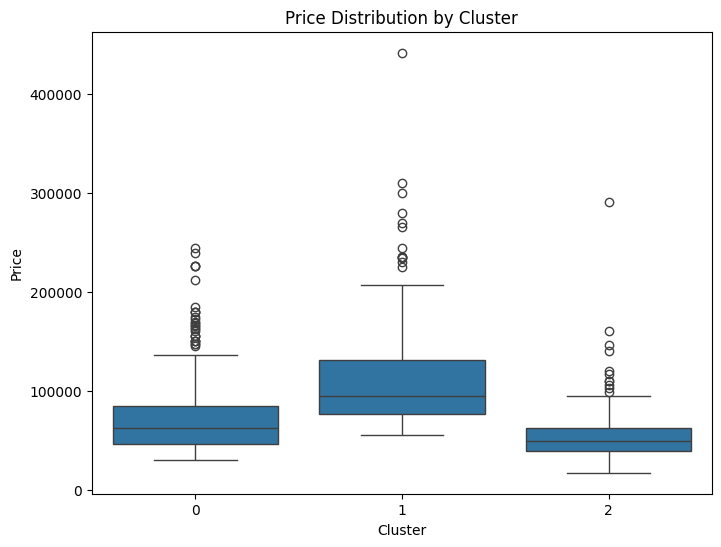

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('../Ensemble/voting/laptopPrice.csv')

# Select features for clustering
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]

# Clean and convert data
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal k using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Fit K-means with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create scatter plot
plt.subplot(1, 2, 2)
scatter = plt.scatter(X['ram_gb'], X['ssd'], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6)
plt.xlabel('RAM (GB)')
plt.ylabel('SSD (GB)')
plt.title('Clusters by RAM and SSD')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Additional visualization - pair plot
features_to_plot = X.copy()
features_to_plot['Cluster'] = df['Cluster']
sns.pairplot(features_to_plot, hue='Cluster', diag_kind='kde')
plt.show()

# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    print(f"RAM: {center[0]:.2f} GB")
    print(f"SSD: {center[1]:.2f} GB") 
    print(f"HDD: {center[2]:.2f} GB")
    print(f"Graphics: {center[3]:.2f} GB\n")

# Print average price per cluster
print("Average Price per Cluster:")
for i in range(3):
    avg_price = df[df['Cluster'] == i]['Price'].mean()
    print(f"Cluster {i}: ${avg_price:,.2f}")

# Create boxplot of prices by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Price', data=df)
plt.title('Price Distribution by Cluster')
plt.show()

